<a href="https://colab.research.google.com/github/Imanchandra2024/FeyynMcDonalds/blob/main/fyenn_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#loading the annabill dataset
import pandas as pd
from scipy.spatial.distance import pdist, squareform
import numpy as np


data = {
    'Anna': [0, 0],
    'Bill': [0, 0],
    'Frank': [40, 40],
    'Julia': [30, 30],
    'Maria': [20, 20],
    'Michael': [95, 95],
    'Tom': [43.64, 43.64]
}
df = pd.DataFrame(data).T
df.columns = ['X', 'Y']


dist_matrix = pdist(df.values, metric='euclidean')
square_dist = squareform(dist_matrix)


names = df.index.tolist()
rounded_df = pd.DataFrame(np.round(square_dist, 2), index=names, columns=names)

print(rounded_df)



           Anna    Bill  Frank  Julia   Maria  Michael    Tom
Anna       0.00    0.00  56.57  42.43   28.28   134.35  61.72
Bill       0.00    0.00  56.57  42.43   28.28   134.35  61.72
Frank     56.57   56.57   0.00  14.14   28.28    77.78   5.15
Julia     42.43   42.43  14.14   0.00   14.14    91.92  19.29
Maria     28.28   28.28  28.28  14.14    0.00   106.07  33.43
Michael  134.35  134.35  77.78  91.92  106.07     0.00  72.63
Tom       61.72   61.72   5.15  19.29   33.43    72.63   0.00


In [6]:
#computing euclidean distances and dissimilarity matrix
import pandas as pd
from sklearn.metrics import pairwise_distances
import numpy as np


data = {
    'Anna': [0, 0],
    'Bill': [0, 0],
    'Frank': [40, 40],
    'Julia': [30, 30],
    'Maria': [20, 20],
    'Michael': [95, 95],
    'Tom': [43.64, 43.64]
}
df = pd.DataFrame(data).T
df.columns = ['X', 'Y']


dissimilarities = pairwise_distances(df, metric='euclidean')
dissim_df = pd.DataFrame(np.round(dissimilarities, 2), index=df.index, columns=df.index)

print("Dissimilarities (Euclidean):")
print(dissim_df)


Dissimilarities (Euclidean):
           Anna    Bill  Frank  Julia   Maria  Michael    Tom
Anna       0.00    0.00  56.57  42.43   28.28   134.35  61.72
Bill       0.00    0.00  56.57  42.43   28.28   134.35  61.72
Frank     56.57   56.57   0.00  14.14   28.28    77.78   5.15
Julia     42.43   42.43  14.14   0.00   14.14    91.92  19.29
Maria     28.28   28.28  28.28  14.14    0.00   106.07  33.43
Michael  134.35  134.35  77.78  91.92  106.07     0.00  72.63
Tom       61.72   61.72   5.15  19.29   33.43    72.63   0.00


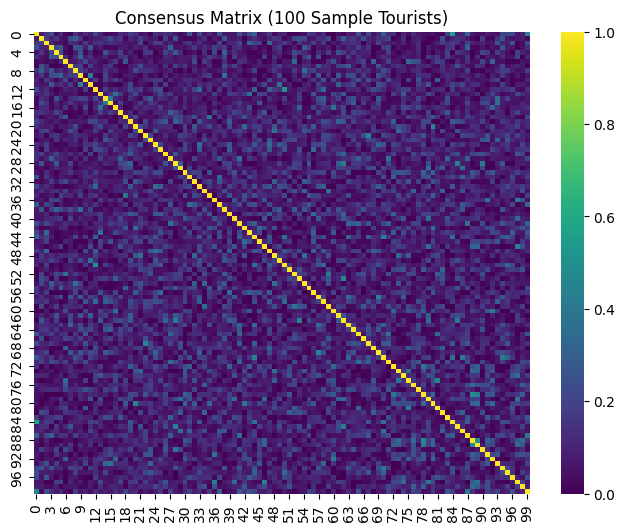

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.utils import resample
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load or simulate the data (binary matrix of 2961 x 27)

np.random.seed(42)
df = pd.DataFrame(np.random.randint(0, 2, size=(2961, 27)),
                  columns=[f"Activity_{i+1}" for i in range(27)])

# 2. Bagged Clustering Parameters
n_clusters = 10
n_iterations = 50
random_state = 1234

# 3. Storage for cluster assignments
all_assignments = np.zeros((df.shape[0], n_iterations))

# 4. Perform bootstrapped clustering
for i in range(n_iterations):
    sample_df = resample(df, replace=True, random_state=random_state + i)

    model = KMeans(n_clusters=n_clusters, n_init=10, random_state=random_state + i)
    model.fit(sample_df)

    # Predict cluster labels for the original full dataset
    labels = model.predict(df)
    all_assignments[:, i] = labels

# 5. Compute consensus matrix
consensus = np.zeros((df.shape[0], df.shape[0]))

for i in range(n_iterations):
    for j in range(df.shape[0]):
        for k in range(j, df.shape[0]):
            if all_assignments[j, i] == all_assignments[k, i]:
                consensus[j, k] += 1
                if j != k:
                    consensus[k, j] += 1

# Normalize by number of iterations
consensus /= n_iterations

# 6. Visualize consensus matrix as similarity heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(consensus[:100, :100], cmap='viridis')  # Show only 100x100 block for clarity
plt.title("Consensus Matrix (100 Sample Tourists)")
plt.show()


/tmp/ipython-input-970072048.py:4: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(1 - consensus, method='average')


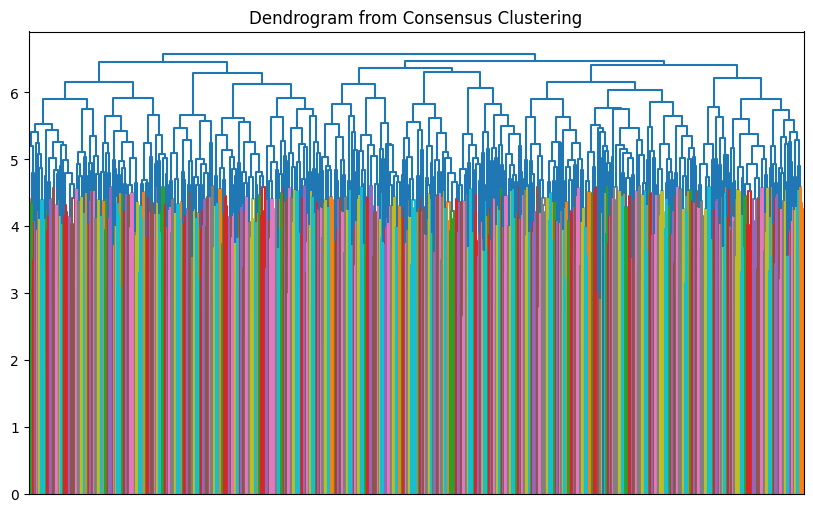

In [3]:
# Hierarchical Clustering on Consensus Matrix
from scipy.cluster.hierarchy import linkage, dendrogram

linkage_matrix = linkage(1 - consensus, method='average')
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, no_labels=True)
plt.title("Dendrogram from Consensus Clustering")
plt.show()


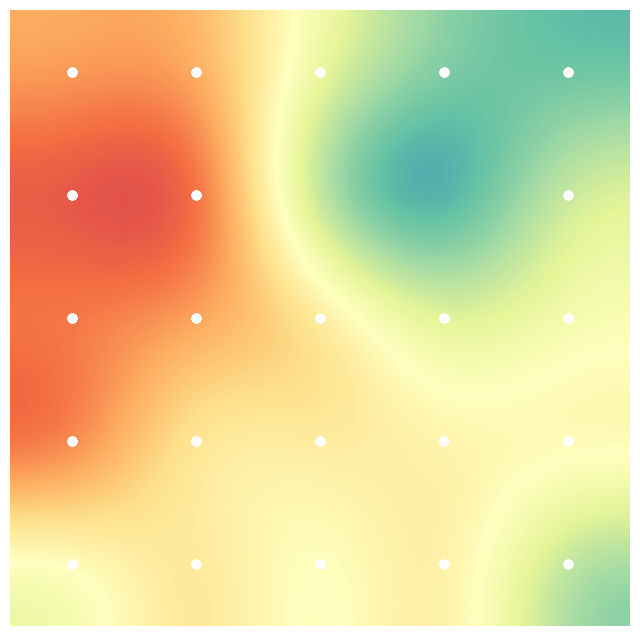

Cluster size per SOM segment:
Series([], Name: count, dtype: int64)


/tmp/ipython-input-1356497697.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SOM_Cluster', data=risk, palette='Set2')
/tmp/ipython-input-1356497697.py:36: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.countplot(x='SOM_Cluster', data=risk, palette='Set2')


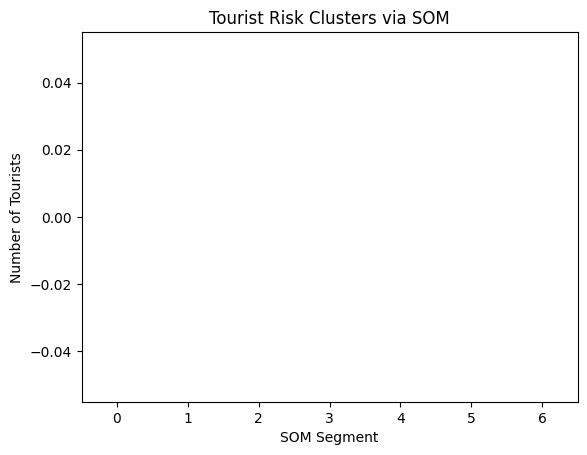

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import somoclu

# 1. Simulate tourist risk-taking data (1000 tourists, 6 binary variables)
np.random.seed(1234)
risk = pd.DataFrame(np.random.randint(0, 2, size=(1000, 6)),
                    columns=['financial', 'career', 'recreational', 'health', 'safety', 'social'])

# 2. Normalize the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
risk_scaled = scaler.fit_transform(risk)

# 3. Create and train SOM using Somoclu (5x5 grid)
n_rows, n_columns = 5, 5
som = somoclu.Somoclu(n_columns, n_rows, compactsupport=False, initialization='pca')
som.train(risk_scaled)

# 4. Plot U-Matrix (distance between codebook vectors)
som.view_umatrix(bestmatches=True)

# 5. Optional: Assign each tourist to a cluster
cluster_labels = som.cluster()
risk['SOM_Cluster'] = cluster_labels

# 6. View the number of tourists in each SOM segment
cluster_counts = risk['SOM_Cluster'].value_counts().sort_index()
print("Cluster size per SOM segment:")
print(cluster_counts)

# 7. Optional: Visualize cluster distribution
sns.countplot(x='SOM_Cluster', data=risk, palette='Set2')
plt.title("Tourist Risk Clusters via SOM")
plt.xlabel("SOM Segment")
plt.ylabel("Number of Tourists")
plt.show()



In [16]:
%pip install somoclu

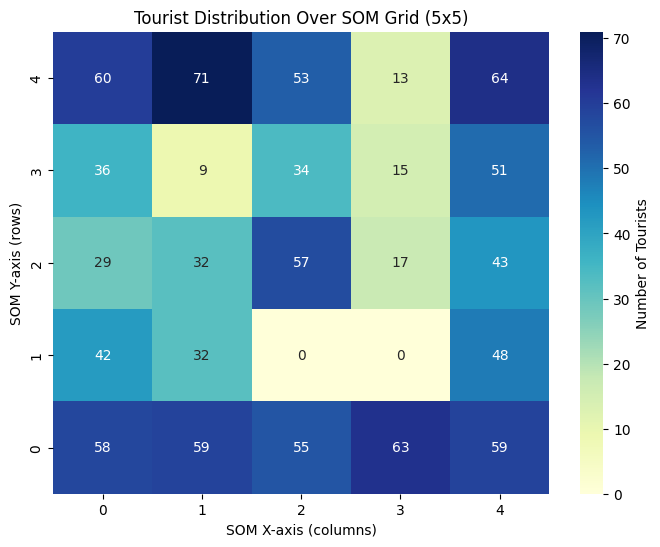

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import somoclu
from sklearn.preprocessing import MinMaxScaler

# 1. Simulate the binary risk-taking data
np.random.seed(1234)
risk = pd.DataFrame(np.random.randint(0, 2, size=(1000, 6)),
                    columns=['financial', 'career', 'recreational', 'health', 'safety', 'social'])

# 2. Normalize the data
scaler = MinMaxScaler()
risk_scaled = scaler.fit_transform(risk)

# 3. Train the SOM
n_rows, n_columns = 5, 5
som = somoclu.Somoclu(n_columns, n_rows, compactsupport=False, initialization='pca')
som.train(risk_scaled)

# 4. Get BMUs (Best Matching Units) — the grid positions each tourist maps to
bmus = som.bmus  # list of (x, y) tuples

# 5. Create a heatmap of how many tourists mapped to each node
heatmap = np.zeros((n_rows, n_columns), dtype=int)
for x, y in bmus:
    heatmap[y, x] += 1  # y=rows, x=columns for imshow

# 6. Plot high-quality heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Number of Tourists'})
plt.title("Tourist Distribution Over SOM Grid (5x5)")
plt.xlabel("SOM X-axis (columns)")
plt.ylabel("SOM Y-axis (rows)")
plt.gca().invert_yaxis()  # To match SOM visual conventions
plt.show()


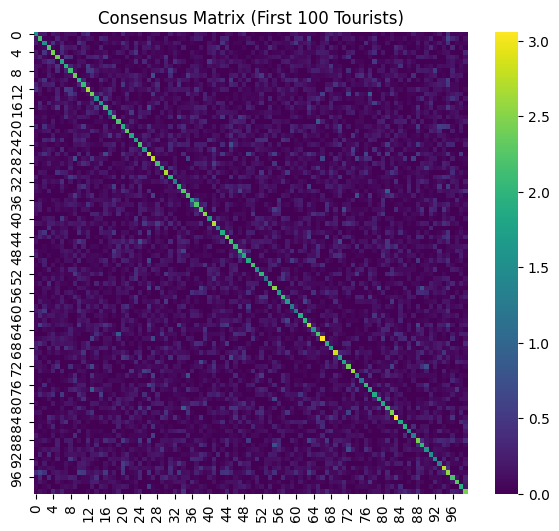

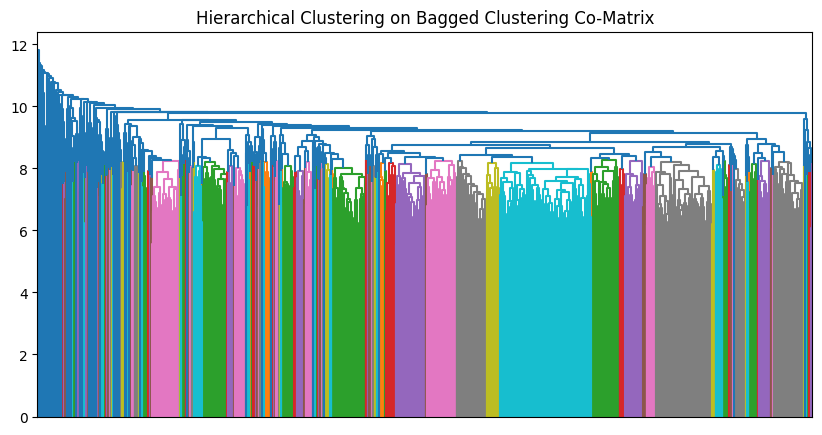

In [18]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Simulate winterActiv dataset (2961 tourists × 27 binary activity features)
np.random.seed(1234)
winter_activ = pd.DataFrame(np.random.randint(0, 2, size=(2961, 27)),
                            columns=[f"Activity_{i+1}" for i in range(27)])

# 2. Normalize the binary data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(winter_activ)

# 3. Bagged Clustering Parameters
n_clusters = 10
n_iterations = 50
n_samples = X_scaled.shape[0]

# 4. Initialize co-assignment matrix
co_matrix = np.zeros((n_samples, n_samples))

# 5. Run bootstrapped K-Means
for i in range(n_iterations):
    boot_idx = resample(np.arange(n_samples), replace=True, n_samples=n_samples, random_state=1234 + i)
    boot_sample = X_scaled[boot_idx]

    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234 + i)
    kmeans.fit(boot_sample)

    labels = kmeans.labels_

    # Build reverse index for original data
    label_map = {}
    for j, idx in enumerate(boot_idx):
        label_map.setdefault(labels[j], []).append(idx)

    # Update co-assignment matrix
    for cluster_points in label_map.values():
        for i1 in cluster_points:
            for i2 in cluster_points:
                co_matrix[i1, i2] += 1

# 6. Normalize the matrix to be [0,1]
co_matrix /= n_iterations

# 7. Plot consensus matrix (heatmap)
plt.figure(figsize=(7, 6))
sns.heatmap(co_matrix[:100, :100], cmap='viridis')
plt.title("Consensus Matrix (First 100 Tourists)")
plt.show()

# 8. Perform hierarchical clustering
linkage_matrix = linkage(1 - co_matrix, method='average')

# 9. Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, no_labels=True)
plt.title("Hierarchical Clustering on Bagged Clustering Co-Matrix")
plt.show()


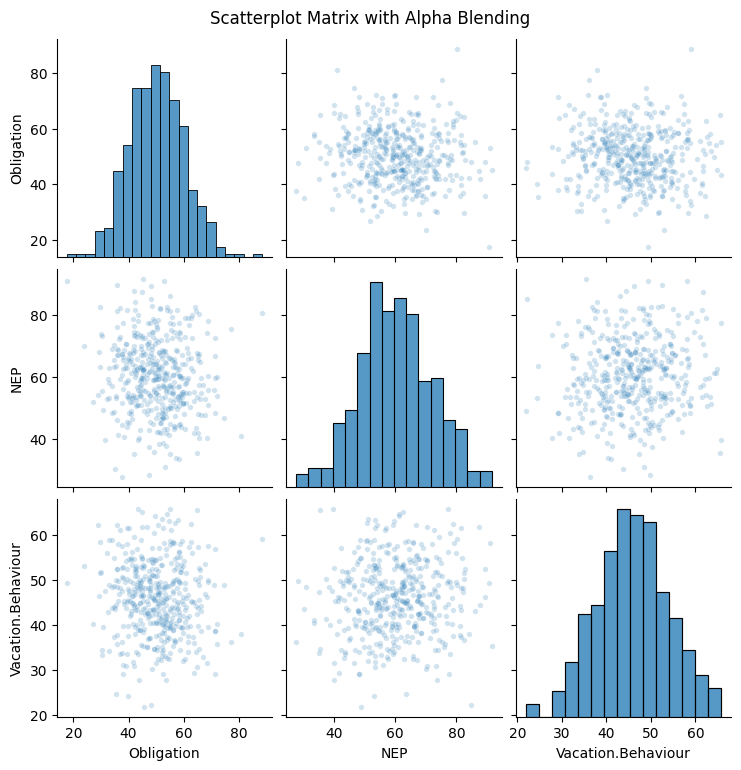

Best models by covariance type:
  FULL - 1 components, BIC = 3878.14
  TIED - 1 components, BIC = 3878.14
  DIAG - 1 components, BIC = 3867.79
  SPHERICAL - 1 components, BIC = 3855.57

Restricted models (equal volume/shape/orientation):
  DIAG - 1 components, BIC = 3867.79
  SPHERICAL - 1 components, BIC = 3855.57


In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# 1. Simulate vacmotdesc (normally you'd load the real data)
np.random.seed(42)
vacmet = pd.DataFrame({
    'Obligation': np.random.normal(loc=50, scale=10, size=500),
    'NEP': np.random.normal(loc=60, scale=12, size=500),
    'Vacation.Behaviour': np.random.normal(loc=45, scale=8, size=500)
})

# 2. Drop missing values (simulate some missing data)
vacmet.loc[::10, 'Vacation.Behaviour'] = np.nan
vacmet_clean = vacmet.dropna()

# 3. Visualize with transparent scatterplot matrix
sns.pairplot(vacmet_clean, plot_kws={'alpha': 0.2, 's': 15})
plt.suptitle("Scatterplot Matrix with Alpha Blending", y=1.02)
plt.show()

# 4. Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(vacmet_clean)

# 5. Fit Gaussian Mixture Models for G = 1 to 8 components
n_components = range(1, 9)
covariance_types = ['full', 'tied', 'diag', 'spherical']
best_models = []

for cov_type in covariance_types:
    bics = []
    for n in n_components:
        gmm = GaussianMixture(n_components=n, covariance_type=cov_type, random_state=42)
        gmm.fit(X_scaled)
        bics.append(gmm.bic(X_scaled))
    best_n = n_components[np.argmin(bics)]
    best_bic = np.min(bics)
    best_models.append((cov_type, best_n, best_bic))

# 6. Print BIC results
print("Best models by covariance type:")
for cov, n, bic in best_models:
    print(f"  {cov.upper()} - {n} components, BIC = {bic:.2f}")

# 7. Fit restricted covariance models like ("EEI", "EII", "EEE") → mapped to 'diag' and 'spherical'
restricted_types = ['diag', 'spherical']
restricted_models = []

for cov_type in restricted_types:
    bics = []
    for n in n_components:
        gmm = GaussianMixture(n_components=n, covariance_type=cov_type, random_state=42)
        gmm.fit(X_scaled)
        bics.append(gmm.bic(X_scaled))
    best_n = n_components[np.argmin(bics)]
    best_bic = np.min(bics)
    restricted_models.append((cov_type, best_n, best_bic))

# 8. Print restricted model BICs
print("\nRestricted models (equal volume/shape/orientation):")
for cov, n, bic in restricted_models:
    print(f"  {cov.upper()} - {n} components, BIC = {bic:.2f}")
